<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/simple-multilinear-regression/blob/main/MultiLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
X1 = np.random.rand(100,1)*10
X2 = np.random.rand(100,1)*20
y = 5 + 3 * X1 + 2 * X2 + np.random.randn(100, 1) * 3
X = np.concatenate([X1,X2], axis=1)

data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
data['Target']=y

In [ ]:
data.head()
data.describe()
data.corr()

,Feature 1,Feature 2,Target
Feature 1,1.000000,-0.034033,0.542597
Feature 2,-0.034033,1.000000,0.798336
Target,0.542597,0.798336,1.000000


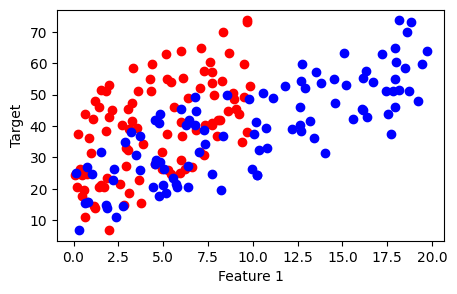

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(data['Feature 1'],data['Target'],color='red',label='Feature 1')
plt.scatter(data['Feature 2'],data['Target'],color='blue',label='Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.show()


# plt.figure(figsize=(5,3))
# plt.scatter(data['Feature 2'],data['Target'],label='Feature 2')
# plt.xlabel('Feature 2')
# plt.ylabel('Target')
# plt.show()

In [ ]:
# def compute_cost(x,y,w,b):
#   m= len(x)
#   cost_history = []
#   y_pred = np.dot(x,w)+b
#   cost = np.sum((y_pred-y) ** 2)

#   return cost / 2*m

def compute_cost(x, y, w, b):
    m = len(x)  # number of training examples
    y_pred = np.dot(x, w) + b  # predicted values using the model
    cost = np.sum((y_pred - y) ** 2)  # sum of squared errors
    return cost / (2 * m)  # divide by 2m for Mean Squared Error

In [ ]:
cost = compute_cost(X,y,[1.2,2.4],2)
print(cost)

246084985.33163425


In [ ]:
# def compute_gradient(x,y,tmp_w,tmp_b,alpha_rate,max_iter):
#   m = len(y)
#   w = tmp_w
#   b = tmp_b
#   cost_history = np.zeros(max_iter)
#   for i in range(max_iter):
#     y_pred = np.dot(x,w)+b
#     cost = np.sum((y_pred-y) ** 2) / 2*m
#     cost_history[i]=cost

#     if i % 100 == 0:
#       print(f'Number of Iterations {i} : {cost}')

#     dj_dw = (1 / m) * np.dot(x.T, (y_pred - y))
#     dj_db = (1 / m) * np.sum(y_pred - y)

#     w = w - (alpha_rate * dj_dw)
#     b = b - (alpha_rate * dj_db)

#   return w,b,cost_history


def compute_gradient(x, y, tmp_w, tmp_b, alpha_rate, max_iter):
    m = len(y)  # number of training examples
    w = tmp_w
    b = tmp_b
    cost_history = np.zeros(max_iter)  # store the cost value at each iteration

    for i in range(max_iter):
        # Compute predictions
        y_pred = np.dot(x, w) + b

        # Calculate the cost (Mean Squared Error)
        cost = compute_cost(x, y, w, b)
        cost_history[i] = cost

        # Print cost every 100 iterations (just for monitoring)
        if i % 100 == 0:
            print(f'Iteration {i}: Cost {cost}')

        # Compute gradients
        dj_dw = (1 / m) * np.dot(x.T, (y_pred - y))  # gradient of w
        dj_db = (1 / m) * np.sum(y_pred - y)  # gradient of b

        # Update weights and bias using gradient descent
        w = w - alpha_rate * dj_dw
        b = b - alpha_rate * dj_db

    return w, b, cost_history

In [ ]:
tmp_w = np.zeros(X.shape[1])
w,b,cost = compute_gradient(X ,y.reshape(-1),tmp_w,2, 0.01, 10000)

Iteration 0: Cost 810.2708571009686
Iteration 100: Cost 4.569348641044282
Iteration 200: Cost 4.488191913301247
Iteration 300: Cost 4.428022692155891
Iteration 400: Cost 4.383413510949398
Iteration 500: Cost 4.350340471112198
Iteration 600: Cost 4.325820272926766
Iteration 700: Cost 4.307641111833245
Iteration 800: Cost 4.294163166199815
Iteration 900: Cost 4.284170679881929
Iteration 1000: Cost 4.276762296918466
Iteration 1100: Cost 4.271269756184629
Iteration 1200: Cost 4.267197611985058
Iteration 1300: Cost 4.264178543181443
Iteration 1400: Cost 4.261940219587226
Iteration 1500: Cost 4.260280736866454
Iteration 1600: Cost 4.259050404081834
Iteration 1700: Cost 4.258138241067445
Iteration 1800: Cost 4.2574619676435255
Iteration 1900: Cost 4.256960581666797
Iteration 2000: Cost 4.2565888564314625
Iteration 2100: Cost 4.2563132610678105
Iteration 2200: Cost 4.256108935944722
Iteration 2300: Cost 4.255957450247093
Iteration 2400: Cost 4.255845139454183
Iteration 2500: Cost 4.25576187275

In [ ]:
print(f'W is {w}')
print(f'b is {b}')

W is [2.89748247 2.10789675]
b is 4.731829355975037


In [ ]:
y_pred = np.dot(X,w)+b

In [ ]:
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


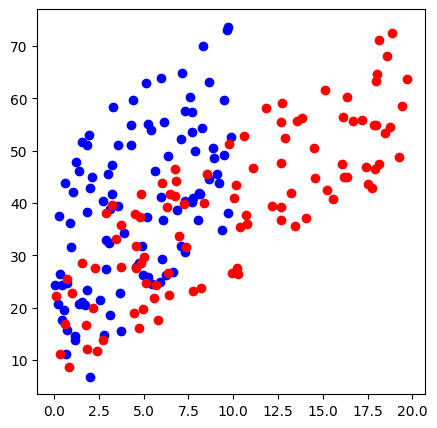

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], y, color="blue", label="F1")
plt.scatter(X[:,1],y_pred,color='red', label='F2')
# plt.plot(X[:,0],y_pred, color='green', label='Predicted')
# plt.plot(X[:,1],y_pred, color='black', label='Predicted')
plt.show()

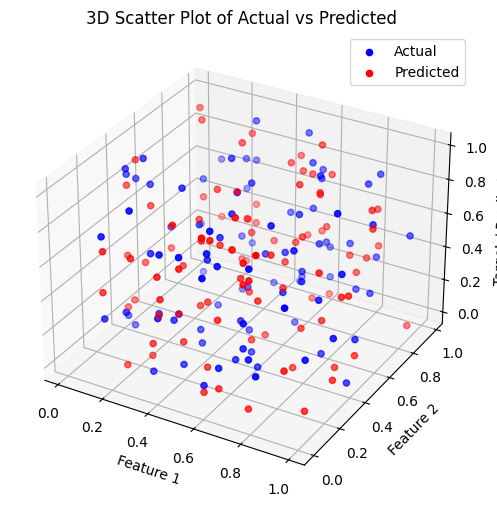

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Sample data (replace with your actual data)
X = np.random.rand(100, 2)
y = np.random.rand(100)
y_pred = np.random.rand(100)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting original data
ax.scatter(X[:, 0], X[:, 1], y, color="blue", label="Actual")

# Plotting predictions
ax.scatter(X[:, 0], X[:, 1], y_pred, color="red", label="Predicted")

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Target / Prediction")
ax.set_title("3D Scatter Plot of Actual vs Predicted")

# Show the plot and interact (hold shift to rotate)
plt.legend()
plt.show()
